In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('churn_data.csv')
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [4]:
df.shape

(2000, 16)

In [5]:
# droping the null values.

df.dropna(inplace = True)
df.shape

(1918, 16)

In [6]:
df.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [7]:
df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [8]:
# dropping columns 'year' and 'phone_no' as they have zero effect on churn prediction.

df.drop(columns = ['year', 'phone_no'], inplace = True)
df.shape

(1918, 14)

In [9]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
for i in ['gender', 'multi_screen', 'mail_subscribed']:
    df[i] = ord_enc.fit_transform(df[[i]])

In [10]:
df

,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,100198,0.0,36,62,0.0,0.0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,100643,0.0,39,149,0.0,0.0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,100756,0.0,65,126,0.0,0.0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,101595,0.0,24,131,0.0,1.0,321.30,9.5,36.41,102,4,3.0,3,0.0
4,101653,0.0,40,191,0.0,0.0,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,993714,1.0,32,61,0.0,0.0,67.50,9.8,7.65,94,6,3.0,2,0.0
1991,993815,1.0,49,50,1.0,1.0,460.65,8.0,52.21,109,3,3.0,0,0.0
1992,994954,0.0,42,119,0.0,1.0,176.70,7.6,20.03,76,3,3.0,3,0.0
1996,998086,1.0,45,127,0.0,0.0,273.45,9.3,30.99,116,3,3.0,1,0.0


In [11]:
print(df['customer_id'].nunique())
df.loc[df['customer_id'].duplicated() == True]

1917


,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
918,530490,1.0,36,172,0.0,0.0,323.55,7.1,36.67,83,1,2.0,3,0.0


In [12]:
df.loc[df['customer_id'] == 530490]

,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
917,530490,0.0,34,59,0.0,1.0,199.65,6.8,22.63,103,3,2.0,1,0.0
918,530490,1.0,36,172,0.0,0.0,323.55,7.1,36.67,83,1,2.0,3,0.0


In [13]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 100)

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [16]:
prediction = log_reg.predict(x_test)
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
from sklearn.metrics import classification_report , roc_auc_score

print(classification_report(y_test, prediction))
print(f'Area under the curve ---> {roc_auc_score(y_test, prediction)}')

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       325
         1.0       0.00      0.00      0.00        59

    accuracy                           0.85       384
   macro avg       0.42      0.50      0.46       384
weighted avg       0.72      0.85      0.78       384

Area under the curve ---> 0.5


In [18]:
# balancing of the dataset is required, as you may see the precision and recall for class 1 is 0 also the auc is just 0.5

In [19]:
log_reg1 = LogisticRegression(class_weight = 'balanced')
log_reg1.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [20]:
prediction_1 = log_reg1.predict(x_test)
prediction_1

array([1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0.

In [21]:
print(classification_report(y_test, prediction_1))
print(f'Area under the curve ---> {roc_auc_score(y_test, prediction_1)}')

              precision    recall  f1-score   support

         0.0       0.86      0.54      0.66       325
         1.0       0.17      0.51      0.25        59

    accuracy                           0.54       384
   macro avg       0.51      0.53      0.46       384
weighted avg       0.75      0.54      0.60       384

Area under the curve ---> 0.525006518904824


In [22]:
# Further balancing of the class can be done by assigning weights manually.

# Decision Tree Classifier 

In [23]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(criterion = "entropy", class_weight = 'balanced')
dec_tree.fit(x_train, y_train)

dtc_prediction = dec_tree.predict(x_test)
print(classification_report(y_test, dtc_prediction))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       325
         1.0       0.78      0.53      0.63        59

    accuracy                           0.90       384
   macro avg       0.85      0.75      0.79       384
weighted avg       0.90      0.90      0.90       384



In [24]:
# this dt model has better accuracy and f1-score for class 1. 

<AxesSubplot:>

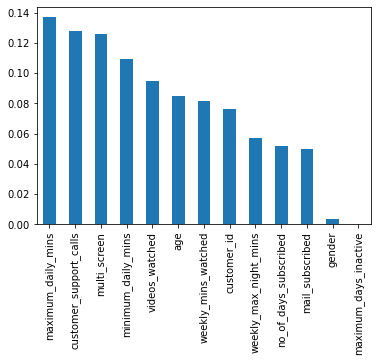

In [25]:
feature_importance = pd.Series(dec_tree.feature_importances_, index=X.columns)
feature_importance.nlargest(15).plot(kind='bar')

In [26]:
# 'gender' and 'max_no_of_days_inactive' have no/less part in prediction the target varaible.